#Drug Classification Dataset
##Team Members:

###Carlos Eduardo García Herrera: 2133000

###Jose Manuel Enriquez Rodriguez: 2132982


The porpuse of the following notebook is get started and familiar with the Drug Classification Dataset


##DataSet Access


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "drug200.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prathamtripathi/drug-classification",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-3788353275.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


##Kwnowing the Dataset

The first 5 entries are showed

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
60,38,F,LOW,NORMAL,29.875,DrugY
183,36,F,HIGH,NORMAL,15.490,DrugY
189,64,M,HIGH,NORMAL,20.932,DrugY
48,23,M,NORMAL,HIGH,31.686,DrugY
132,49,M,LOW,NORMAL,13.598,drugX


###Column Description


####Target Column
#####**Drug Type**
Drug applied to the Patient


####Features Columns
#####**Age**
Age of the Patient (Numeric)
#####**Sex**
Sex of the Patient (F: Femenine, M: Masculine)
#####**BP (Bload Pressure Levels)**
Bload Pressure Level of the Patient (LOW, NORMAL, HIGH)
#####**Cholesterol**
Cholesterol Level of the Patient (LOW, NORMAL, HIGH)
#####**Na_to_K (Na to Potassium Ration)**
Amount of sodium (Na) to potassium (K) in the Patient bload


Basic Overview of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


###Data statistics

In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
print("\nMissing value:\n", df.isna().sum())


Missing value:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

####Age Distribution

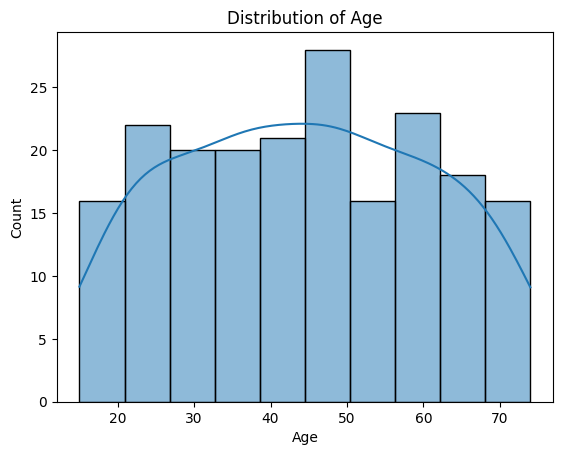

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

targetCol = "Age"
sns.histplot(df[targetCol], kde=True, bins=10)
plt.title(f'Distribution of {targetCol}')
plt.show()

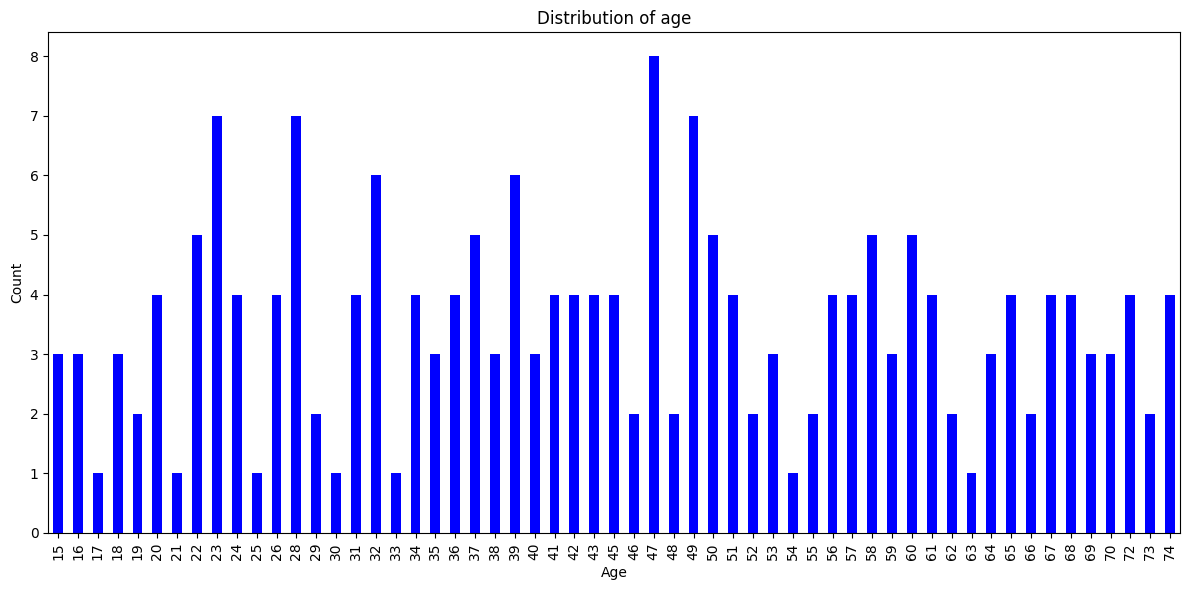

In [ ]:
plt.figure(figsize=(12, 6))

df['Age'].value_counts().sort_index().plot(kind = "bar", color = "blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age")
plt.tight_layout()
plt.show()

<Axes: >

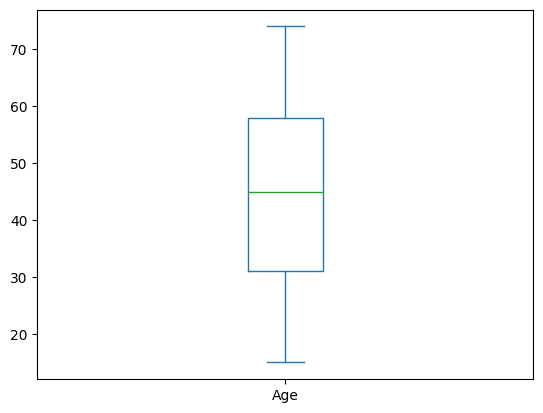

In [ ]:
df['Age'].plot(kind='box')

####Na to Potassium Ratio Distribution

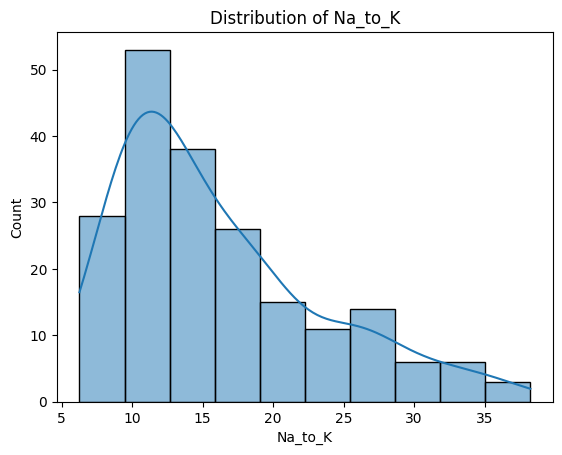

In [ ]:
targetCol = "Na_to_K"
sns.histplot(df[targetCol], kde=True, bins=10)
plt.title(f'Distribution of {targetCol}')
plt.show()

#### Sex Distribution

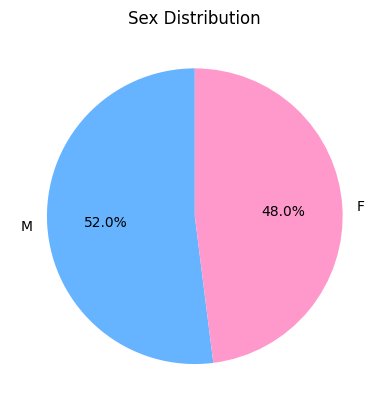

In [ ]:
targetCol = 'Sex'
gender_counts = df[targetCol].value_counts()
gender_counts
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff99cc'], startangle=90, legend=False)

plt.title(f'{targetCol} Distribution')
plt.ylabel('')
plt.show()

#### Bload Pressure Levels Distribution

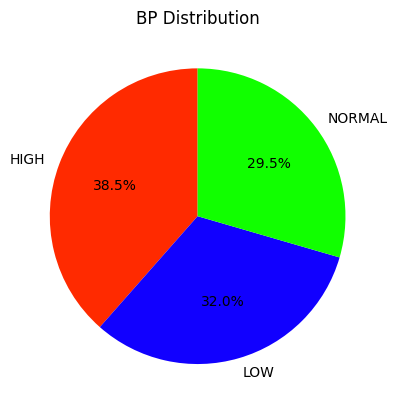

In [ ]:
targetCol = 'BP'
gender_counts = df[targetCol].value_counts()
gender_counts
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF2A00','#1100FF','#11FF00',], startangle=90, legend=False)

plt.title(f'{targetCol} Distribution')
plt.ylabel('')
plt.show()

#### Cholesterol Levels Distribution

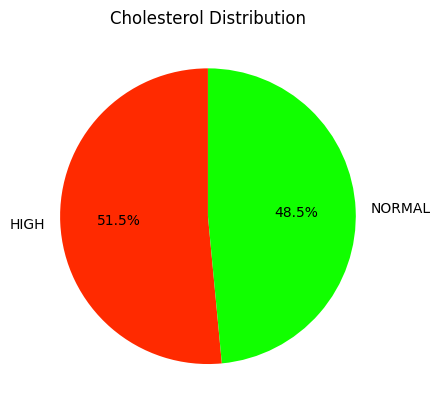

In [ ]:
targetCol = 'Cholesterol'
gender_counts = df[targetCol].value_counts()
gender_counts
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF2A00','#11FF00',], startangle=90, legend=False)

plt.title(f'{targetCol} Distribution')
plt.ylabel('')
plt.show()

#### Drug Distribution

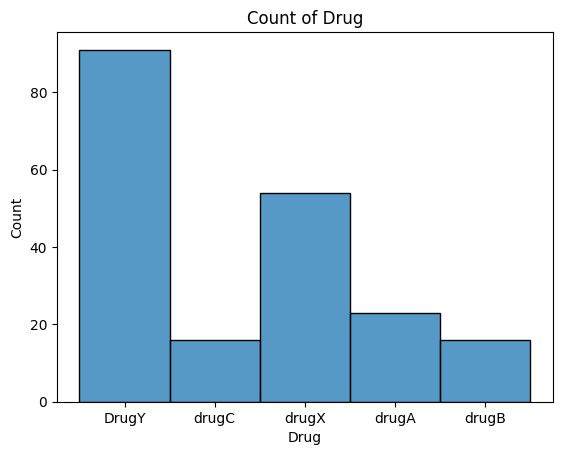

In [ ]:
targetCol = 'Drug'
sns.histplot(df[targetCol], bins=10)
plt.title(f'Count of {targetCol}')
plt.show()

### Data Correlation
The following plots are used to show possible correlations between the columns on the dataset

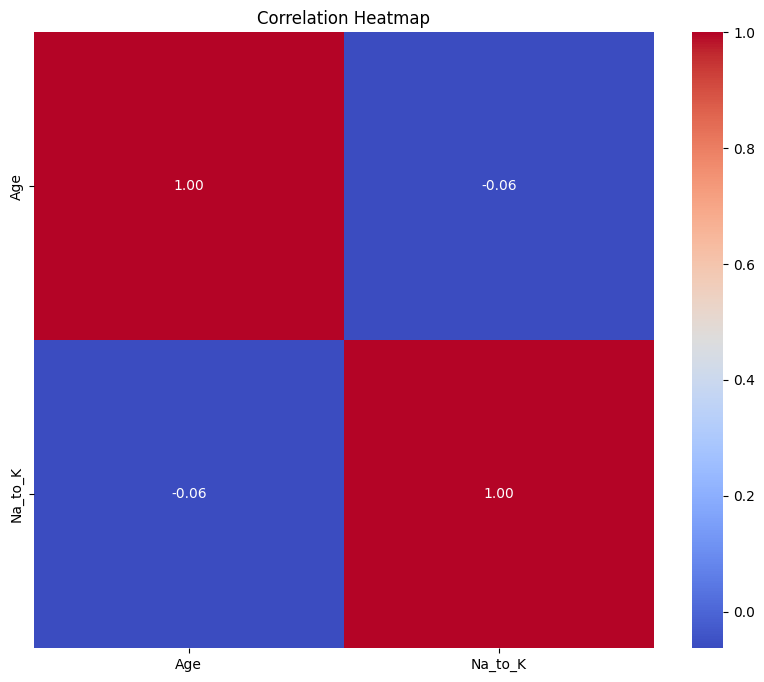

In [ ]:
# Suppose df is your drugs dataset
numeric_df = df.select_dtypes(include='number')  # only numeric columns

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This means age and the sodium-to-potassium ratio are almost independent

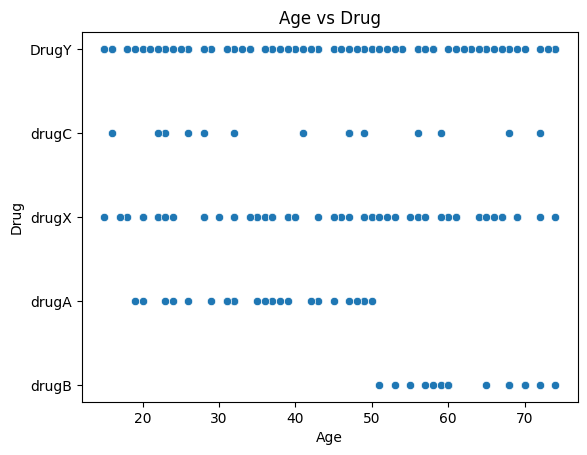

In [ ]:
sns.scatterplot(data=df, x="Age", y="Drug")
plt.title("Age vs Drug")
plt.show()

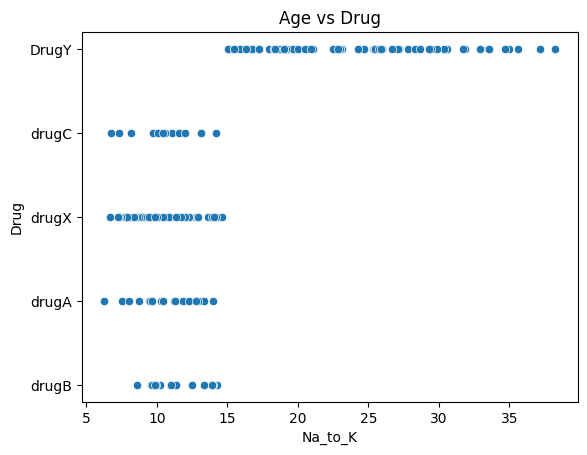

In [ ]:
sns.scatterplot(data=df, x="Na_to_K", y="Drug")
plt.title("Age vs Drug")
plt.show()

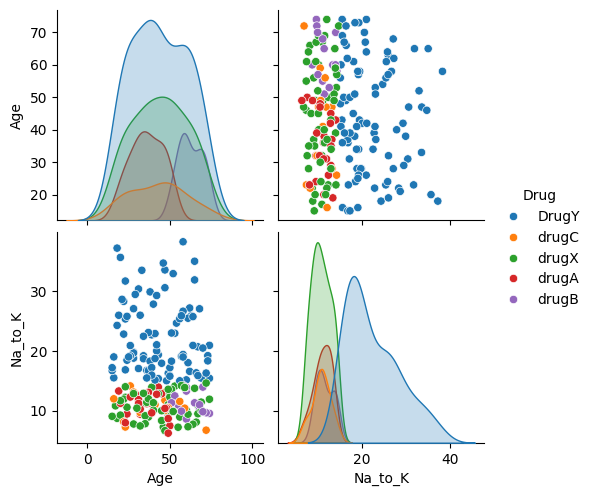

In [ ]:
sns.pairplot(df, hue="Drug", vars=numeric_df.columns)
plt.show()

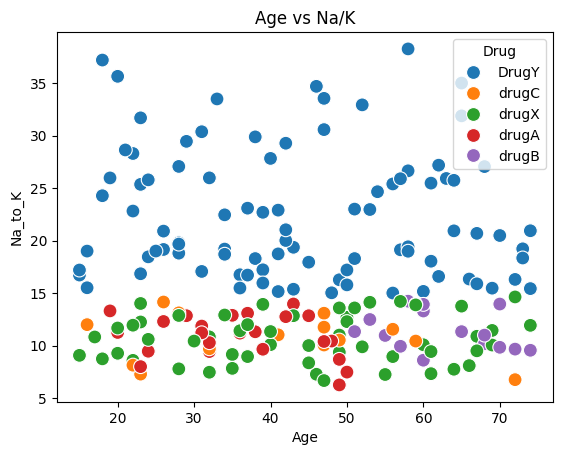

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df,x="Age",y='Na_to_K',hue=df['Drug'],s=100)
plt.title("Age vs Na/K")
plt.show()

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
